## Fashion Mnist

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from keras.datasets import fashion_mnist

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

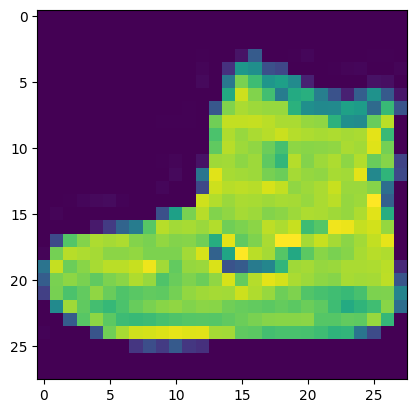

In [25]:
plt.imshow(x_train[0])

In [26]:
# Data Normalization

x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
x_test.shape

(10000, 28, 28)

In [29]:
# Reshape
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [30]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [31]:
y_train[0]

9

In [32]:
# Convert the y_train and y_test values to be one-hot encoded for categorical analysis by keras
from keras.utils.np_utils import to_categorical

y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [34]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [35]:
# BUILDING THE MODEL

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [36]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [38]:
model.fit(x_train,y_cat_train, epochs=10,verbose=1)

Epoch 1/10
1875/1875 [==============================] - 15s 5ms/step - loss: 0.4688 - accuracy: 0.8288
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3150 - accuracy: 0.8856
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2749 - accuracy: 0.8997
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2533 - accuracy: 0.9071
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2377 - accuracy: 0.9146
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2278 - accuracy: 0.9187
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2211 - accuracy: 0.9196
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2179 - accuracy: 0.9229
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2150 - accuracy: 0.9241
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - l

In [41]:
# Model Evaluate

model.metrics_names

['loss', 'accuracy']

In [42]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3670 - accuracy: 0.8908


[0.3669692277908325, 0.8907999992370605]

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
preds_prob=model.predict(x_test)
predictions = np.argmax(preds_prob,axis=1)

313/313 [==============================] - 1s 2ms/step


In [50]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.84      0.83      1000
           3       0.92      0.89      0.90      1000
           4       0.87      0.79      0.83      1000
           5       0.95      0.98      0.96      1000
           6       0.67      0.73      0.70      1000
           7       0.97      0.92      0.94      1000
           8       0.94      0.99      0.96      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [52]:
confusion_matrix(y_test,predictions)

array([[822,   1,  23,  10,   2,   1, 129,   0,  12,   0],
       [  1, 976,   0,  11,   3,   0,   6,   0,   3,   0],
       [ 20,   0, 841,   7,  42,   0,  86,   0,   4,   0],
       [ 22,   6,  11, 894,  16,   0,  46,   0,   5,   0],
       [  1,   0,  75,  32, 790,   0,  97,   0,   5,   0],
       [  0,   0,   0,   0,   0, 976,   0,   9,   1,  14],
       [102,   0,  66,  21,  52,   1, 729,   0,  29,   0],
       [  0,   0,   0,   0,   0,  39,   0, 923,   1,  37],
       [  1,   1,   3,   2,   3,   1,   1,   0, 986,   2],
       [  0,   0,   0,   0,   0,   6,   0,  23,   0, 971]], dtype=int64)